## Weatherpy Homework

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from api_key import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### General Cities List

In [2]:
## Generate cities list and dependencies setup

# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Build URL for API calls including cities and unit of measure

unit = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
response_json = requests.get(url_ping).json()
pprint(response_json)




{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 29.9697, 'lon': 40.2064},
 'dt': 1667757423,
 'id': 102527,
 'main': {'feels_like': 71.71,
          'grnd_level': 954,
          'humidity': 37,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 72.97,
          'temp_max': 72.97,
          'temp_min': 72.97},
 'name': 'Sakakah',
 'sys': {'country': 'SA',
         'id': 7431,
         'sunrise': 1667705798,
         'sunset': 1667744936,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 76, 'gust': 17.9, 'speed': 9.91}}


In [4]:
# Lists for results
lat = []
lon = []
city_found = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

# Counter for print list
count = 0

# for Loop to iterate through cities selected
for city in cities:
    print(f'Record found {count} | {city_found}')
    count += 1

    url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
    response_json = requests.get(url_ping).json()

    # Create dictionary for data from API calls
    weather_data = {}

    # Exceptions for cities to skip
    try:        
        lat.append(response_json["coord"]["lat"])
        lon.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        windspeed.append(response_json["wind"]["speed"])
        date.append(response_json["dt"])
        country.append(response_json["sys"]["country"])
        city_found.append(response_json["name"])
        pprint(f'City Found: {city_found}')
    except:
        pprint(f'City NOT found: Skipping...')
        continue
print("-----------------------")
print("Data Complete")
print("------------------------")

Record found 0 | []
"City Found: ['Upernavik']"
Record found 1 | ['Upernavik']
"City Found: ['Upernavik', 'Punta Arenas']"
Record found 2 | ['Upernavik', 'Punta Arenas']
"City Found: ['Upernavik', 'Punta Arenas', 'Manakara']"
Record found 3 | ['Upernavik', 'Punta Arenas', 'Manakara']
"City Found: ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata']"
Record found 4 | ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata']
("City Found: ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata', "
 "'Clyde River']")
Record found 5 | ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata', 'Clyde River']
("City Found: ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata', "
 "'Clyde River', 'Te Anau']")
Record found 6 | ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata', 'Clyde River', 'Te Anau']
("City Found: ['Upernavik', 'Punta Arenas', 'Manakara', 'Mar del Plata', "
 "'Clyde River', 'Te Anau', 'Mataura']")
Record found 7 | ['Upernavik', 'Punta Arenas', 'Manakara',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Create data frame 
weather_data = pd.DataFrame({ "City": city_found,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Temperature (F)": temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed (mph)": windspeed,
                                "Date": date
                                })
weather_data


City Country  Latitude  Longitude  Temperature (F)  Humidity  \
0        Upernavik      GL   72.7868   -56.1549            18.39        91   
1     Punta Arenas      CL  -53.1500   -70.9167            62.71        48   
2         Manakara      MG  -22.1333    48.0167            73.24        84   
3    Mar del Plata      AR  -38.0023   -57.5575            77.83        79   
4      Clyde River      CA   70.4692   -68.5914             1.63        55   
..             ...     ...       ...        ...              ...       ...   
582           Faya      SA   18.3851    42.4509            62.67        68   
583     Baruun-Urt      MN   46.6806   113.2792            24.39        74   
584    Pangnirtung      CA   66.1451   -65.7125             5.81        76   
585        Taiyuan      CN   37.8694   112.5603            37.26        75   
586     Abbeyfeale      IE   52.3814    -9.3025            49.39        88   

     Cloudiness  Windspeed (mph)        Date  
0           100             4.65  1667757426  
1             0            19.57  1667757427  
2            99             7.43  1667757427  
3             0            28.01  1667757262  
4             0             4.61  1667757427  
..          ...              ...         ...  
582          43             1.43  1667757636  
583           0             8.03  1667757636  
584          33             5.26  1667757636  
585           0             2.24  1667757637  
586          86            13.15  1667757638  

[587 rows x 9 columns]

In [18]:
# Output File (CSV)
weather_output_file = "weather_data.csv"
weather_data.to_csv(weather_output_file, index_label="city", header=True)

In [19]:
# Create and display summary of dataframe
summary_weather = weather_data.describe()
summary_weather

Latitude   Longitude  Temperature (F)    Humidity  Cloudiness  \
count  587.000000  587.000000       587.000000  587.000000  587.000000   
mean    19.036999   15.573528        58.811550   70.810903   58.964225   
std     33.857990   90.855423        24.753969   21.424525   38.232454   
min    -54.800000 -179.166700       -24.840000    9.000000    0.000000   
25%     -9.515250  -66.603200        43.710000   60.500000   20.000000   
50%     22.890900   18.423200        66.780000   75.000000   73.000000   
75%     48.475100   94.869450        78.035000   87.000000   98.500000   
max     78.218600  179.316700        99.860000  100.000000  100.000000   

       Windspeed (mph)          Date  
count       587.000000  5.870000e+02  
mean          7.875468  1.667758e+09  
std           5.258369  9.363613e+01  
min           0.000000  1.667757e+09  
25%           4.000000  1.667757e+09  
50%           6.690000  1.667758e+09  
75%          10.360000  1.667758e+09  
max          28.770000  1.667758e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%. 
count = 0
humidity_high = []

# Find indices with hummidity > 100%
for value in weather_data["Humidity"]:
    if value > 100 == True:
        humidity_high.appent(count)
        count += 1
    else:
        count += 1

# Indicies to drop
if humidity_high == []:
    print("No cities with humidity > 100%")
else:
    print(f'Drop indices {humidity_high}')

No cities with humidity > 100%


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs Temperature Plot

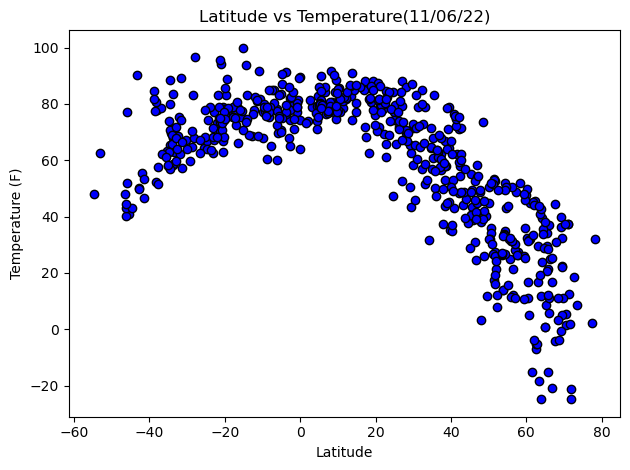

In [22]:
# Latitude vs temp scatter plot
x_values = weather_data["Latitude"]
y_values = weather_data["Temperature (F)"]
plt.scatter(x_values, y_values, color='blue', edgecolors='black')
plt.title("Latitude vs Temperature (11/06/22)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("images\lat_vs_temp.png")
plt.show()


This scatter plot demonstrates the relationship between latitude and temperature for the cities included in the data frame "weather_data".  Latitudes = "0" are at the equator which correlates to higher temperatures.  As the latitude increases, moving away from the equator, the location's corresponding temperature decreases.

### Latitude vs. Humidity Plot

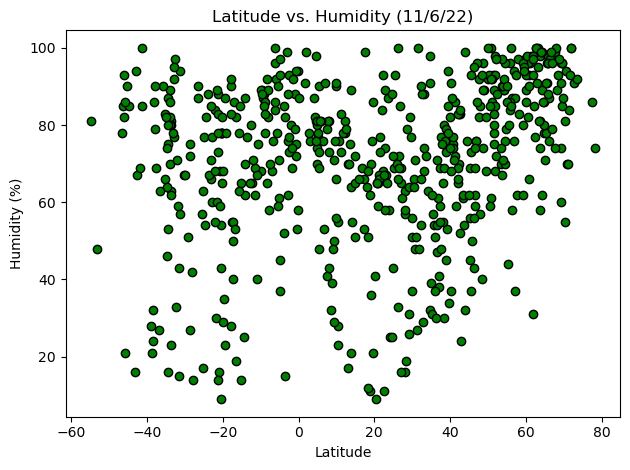

In [23]:
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]
plt.scatter(x_values, y_values, color="green", edgecolors="black")
plt.title("Latitude vs. Humidity (11/6/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("images\lat_vs_humidity.png")
plt.show()

This scatter plot shows the relationship between latitude and humidity.  Humidity is also impacted by elevation of the location. As the plot demonstrates, there is a wide variation of humidity level for each location, not necessarily impacted by latitude, but more strongly correlated with each location's elevation.

#### Latitude vs Cloudiness Plot

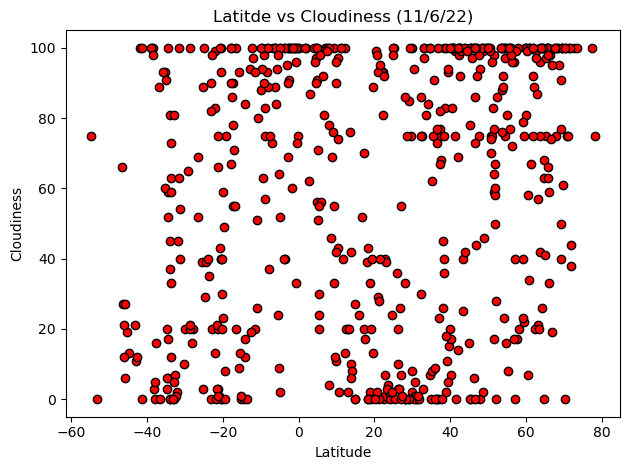

In [25]:
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values, y_values, color="red", edgecolors="black")
plt.title("Latitde vs Cloudiness (11/6/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("images\lat_vs_cloudiness.png")
plt.show()

The relationship between cloudiness and latitude shown in this plot reveals a wide variation in cloudiness for locations.  However, those locations -20 to 20 and 40-60 degrees of latitude do have a slightly higher tendency for increased clouds, depending on elevation of the location